<a href="https://colab.research.google.com/github/Vineetttt/IPCV/blob/main/JAI_IPCV_088.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **EXPT - 1**

11490434/11490434 [==============================] - 0s 0us/step


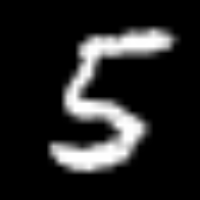

In [ ]:
import math
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd
import numpy as np
import keras
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)
from google.colab.patches import cv2_imshow
def zoom(image):
  return cv2.resize(image,(200, 200))
idx=np.random.randint(0,60000)
image=x_train[idx]
z_image=zoom(image)
cv2_imshow(z_image)

### **Grey Scaling**

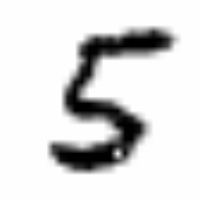

In [ ]:
def greyscale(image):
  og_shape = image.shape
  flat_img = image.flatten()
  L=flat_img.max()
  new_img=[]
  for pixel in flat_img:
    new_img.append(L-1-pixel)
  return np.array(new_img).reshape(og_shape).astype(np.uint8)

grey_image=greyscale(image)
zoom_gimg=zoom(grey_image)
cv2_imshow(zoom_gimg)

### **Cropping**

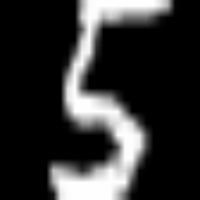

In [ ]:
def image_crop(image, x, y, h, w):
  return image[x:x+w][y:y+h]

cropped_image=image_crop(image,3,3,20,20)
zoom_cimage=zoom(cropped_image)
cv2_imshow(zoom_cimage)

### **Arithmetic Operations**

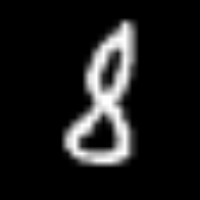

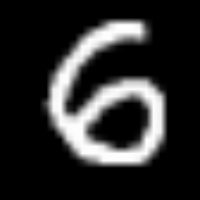

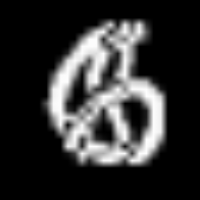

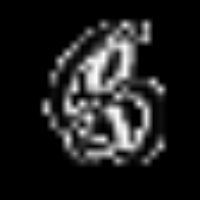

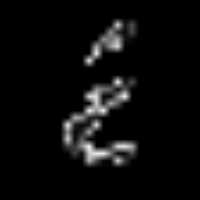

<ipython-input-4-74f12f4b92e1>:8: RuntimeWarning: divide by zero encountered in divide
  return image1/image2
<ipython-input-4-74f12f4b92e1>:8: RuntimeWarning: invalid value encountered in divide
  return image1/image2
/usr/local/lib/python3.10/dist-packages/google/colab/patches/__init__.py:18: RuntimeWarning: invalid value encountered in cast
  a = a.clip(0, 255).astype('uint8')


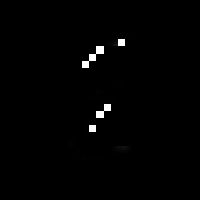

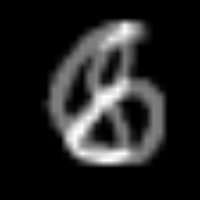

In [ ]:
def add(image1, image2):
  return image1+image2
def sub(image1, image2):
  return image1-image2
def mult(image1, image2):
  return image1*image2
def div(image1, image2):
  return image1/image2
def blend(image1, image2, alpha):
  return (alpha*image1+(1-alpha)*image2)

idx=np.random.randint(0,60000,2)
image1=x_train[idx[0]]
image2=x_train[idx[1]]

cv2_imshow(zoom(image1))
cv2_imshow(zoom(image2))
cv2_imshow(zoom(add(image1,image2)))
cv2_imshow(zoom(sub(image1,image2)))
cv2_imshow(zoom(mult(image1,image2)))
cv2_imshow(zoom(div(image1,image2)))
cv2_imshow(zoom(blend(image1,image2,0.5)))

### **Logical Operations**

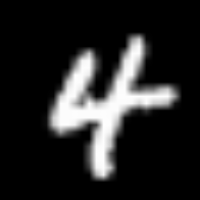

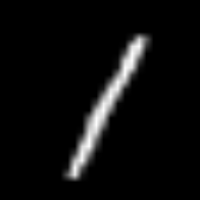

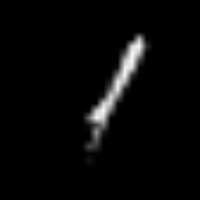

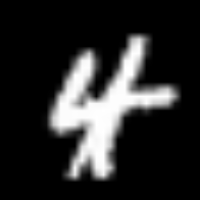

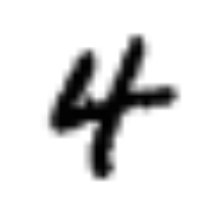

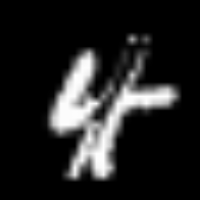

In [ ]:
def Aand(image1, image2):
  return np.bitwise_and(image1, image2)
def Aor(image1, image2):
  return np.bitwise_or(image1, image2)
def Anot(image1):
  return np.bitwise_not(image1)
def Axor(image1, image2):
  return np.bitwise_xor(image1, image2)

idx=np.random.randint(0,60000,2)
image1=x_train[idx[0]]
image2=x_train[idx[1]]
cv2_imshow(zoom(image1))
cv2_imshow(zoom(image2))
cv2_imshow(zoom(Aand(image1,image2)))
cv2_imshow(zoom(Aor(image1,image2)))
cv2_imshow(zoom(Anot(image1)))
cv2_imshow(zoom(Axor(image1,image2)))


### **Bitwise L,R shift**

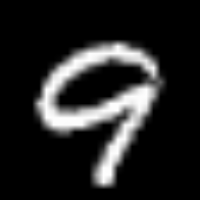

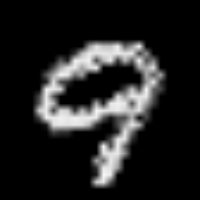

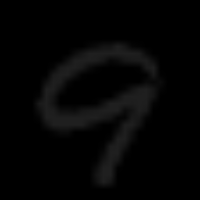

In [ ]:
def bls(image,n):
  return np.left_shift(image,n)
def brs(image,n):
  return np.right_shift(image,n)

#if yeh allow nahi kiya toh iterate through each element and do pixel_value<<n for left shift and >>n for right shift
idx=np.random.randint(0,60000)
image=x_train[idx]
cv2_imshow(zoom(image))
cv2_imshow(zoom(bls(image,3)))
cv2_imshow(zoom(brs(image,3)))

### **EXPT - 2**

In [ ]:
import seaborn as sns

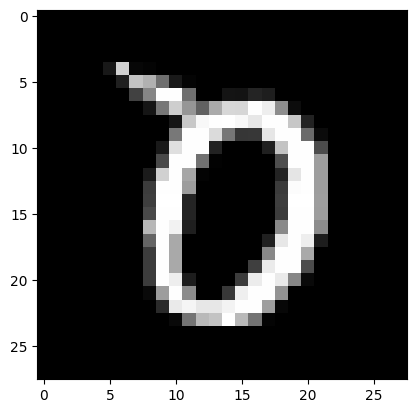

In [ ]:
idx=np.random.randint(0,60000)
image=x_train[idx]
plt.imshow(image, cmap='gray')

### **Thresholding**

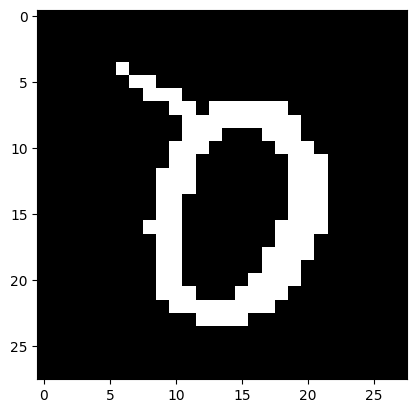

In [ ]:
def thresholding(image, t):
  og_image=image.shape
  temp_img=image.flatten()
  new_image=[]
  for pixel in temp_img:
    new_image.append(pixel>=t)
  return np.array(new_image).reshape(og_image)

i1=thresholding(image,127)
plt.imshow(i1,cmap='gray')


### **Slicing with Background**

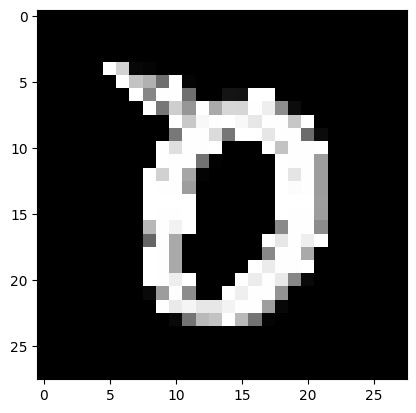

In [ ]:
def slice_wback(image, a ,b):
  og_shape=image.shape
  temp_image=image.flatten()
  new_image=[]
  L=image.max()
  for pixel in temp_image:
    if(pixel<b and pixel>a):
      new_image.append(L)
    else:
      new_image.append(pixel)
  return np.array(new_image).reshape(og_shape)

i2=slice_wback(image, 20, 100)
plt.imshow(i2, cmap='gray')

### **Slicing Without Background**

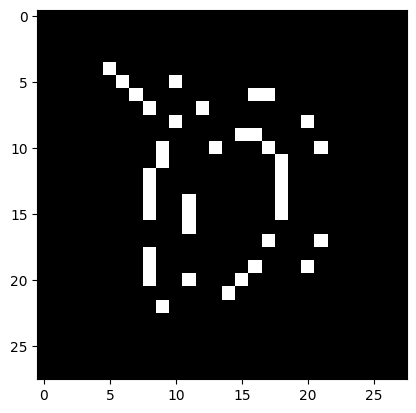

In [ ]:
def slice_woback(image, a ,b):
  og_shape=image.shape
  temp_image=image.flatten()
  new_image=[]
  L=image.max()
  for pixel in temp_image:
    if(pixel<b and pixel>a):
      new_image.append(L)
    else:
      new_image.append(0)
  return np.array(new_image).reshape(og_shape)

i3=slice_woback(image, 20, 100)
plt.imshow(i3, cmap='gray')

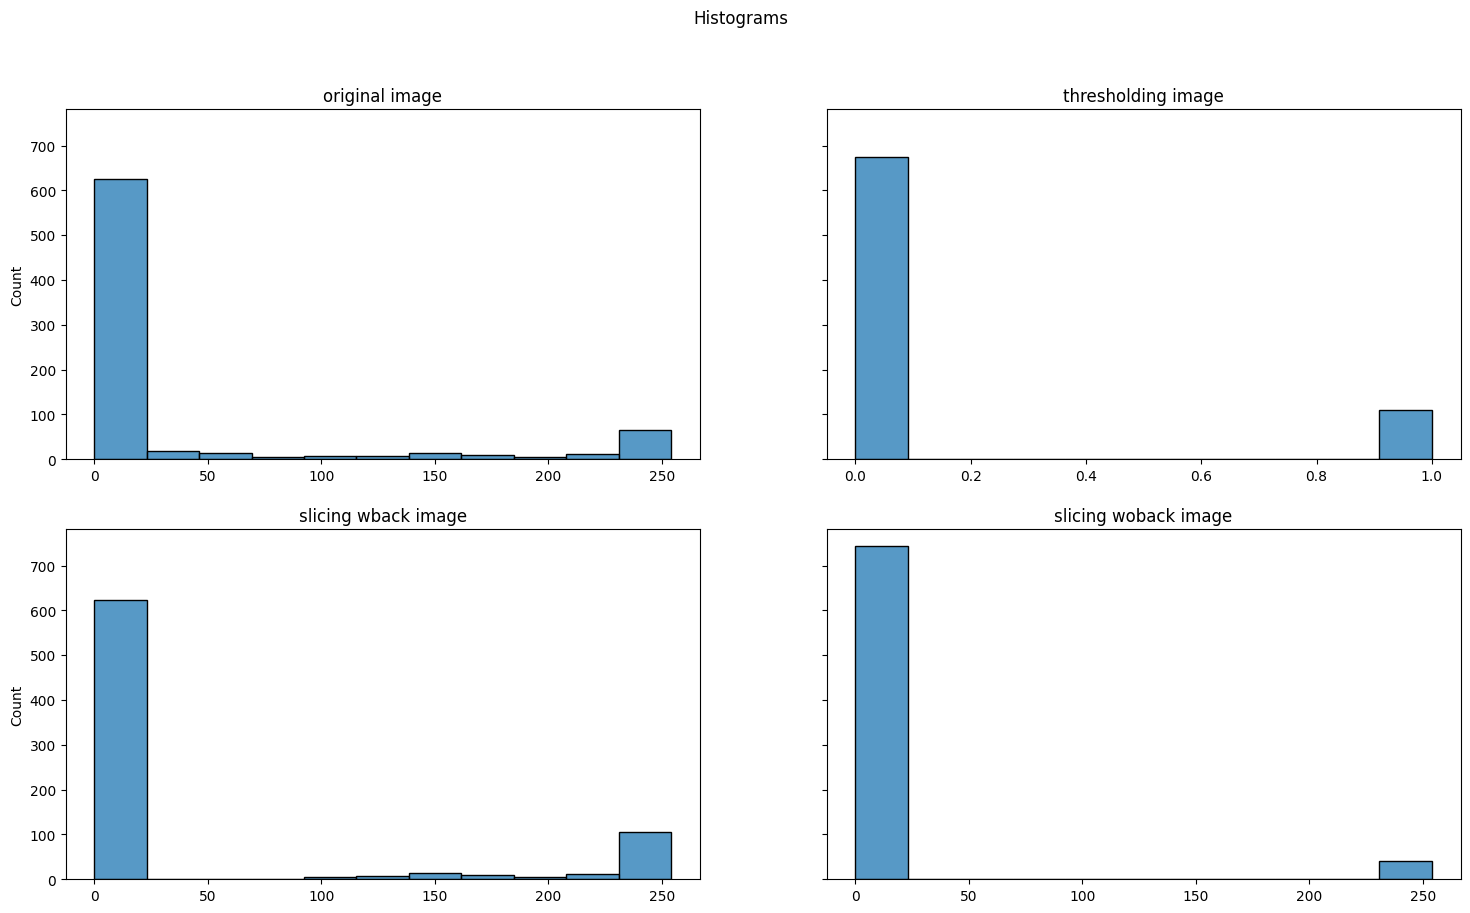

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(18,10), sharey=True)
fig.suptitle("Histograms")

sns.histplot(ax=axes[0,0], data=image.flatten())
axes[0,0].title.set_text('original image')
sns.histplot(ax=axes[0,1], data=i1.flatten())
axes[0,1].title.set_text('thresholding image')
sns.histplot(ax=axes[1,0], data=i2.flatten())
axes[1,0].title.set_text('slicing wback image')
sns.histplot(ax=axes[1,1], data=i3.flatten())
axes[1,1].title.set_text('slicing woback image')

### **EXPT - 3**

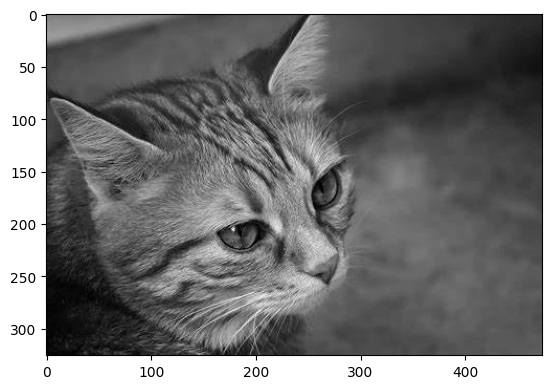

In [ ]:
image=cv2.imread('/content/cat.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

### **Contrast Stretching**

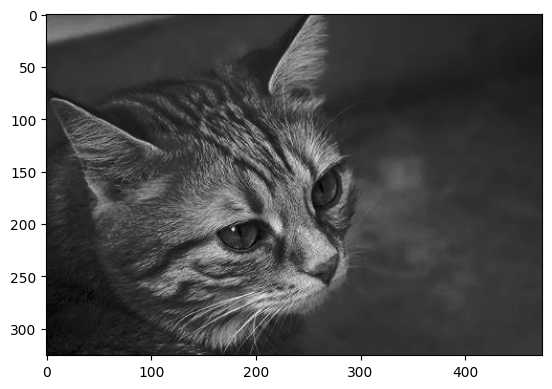

In [ ]:
def contrast_stretch(image, s1, s2, r1, r2):
  og_shape=image.shape
  temp_image=image.flatten()
  new_image=[]
  alpha=s1/r1
  beta=(s2-s1)/(r2-r1)
  gamma=(255-s2)/(255-r2)
  for pixel in temp_image:
    if(pixel<r1):
      new_image.append(alpha*pixel)
    elif(pixel<r2 and pixel>=r1):
      new_image.append(beta*(pixel-r1)+s1)
    else:
      new_image.append(gamma*(pixel-r2)+s2)
  return np.array(new_image).reshape(og_shape)

cs=contrast_stretch(image, 20, 60, 10, 100)
plt.imshow(cs, cmap='gray')

### **Log Transformation**

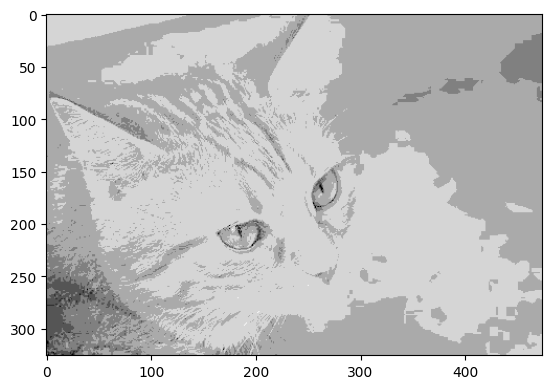

In [ ]:
def log_transform(image, c):
  og_shape=image.shape
  temp_image=image.flatten()
  new_image=[]
  for pixel in temp_image:
    new_image.append(round(c*np.log(1+pixel)))
  return np.array(new_image).reshape(og_shape)

lt=log_transform(image, 1)
plt.imshow(lt, cmap='gray')

### **Power Transform**

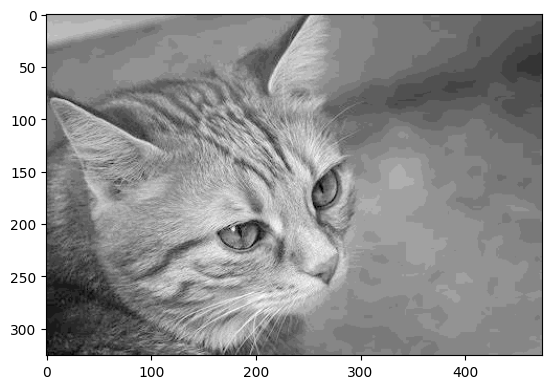

In [ ]:
def power_transform(image, c, gamma):
  og_shape=image.shape
  temp_image=image.flatten()
  new_image=[]
  for pixel in temp_image:
    new_image.append(round(c*math.pow(pixel,gamma)))
  return np.array(new_image).reshape(og_shape)

pt=power_transform(image, 0.7, 0.6)
plt.imshow(pt, cmap='gray')

### **EXPT - 4**

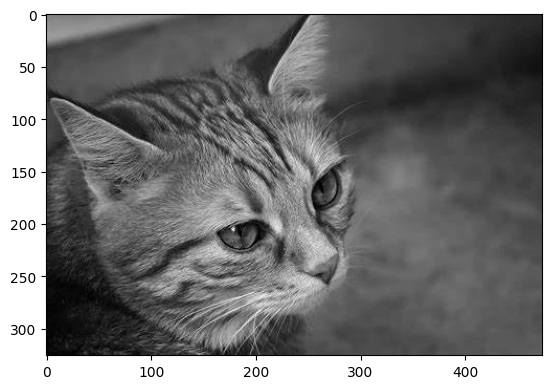

In [ ]:
import scipy
from scipy.ndimage import correlate
image=cv2.imread('/content/cat.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')


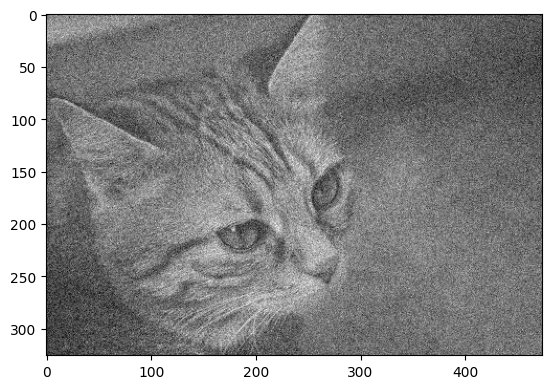

In [ ]:
def add_gaussian_noise(image, mean, stdev):
  noise=np.random.normal(mean, stdev, image.shape)
  new_image = image+noise
  return new_image
gnoise_img = add_gaussian_noise(image, 20, 34)
plt.imshow(gnoise_img, cmap='gray')

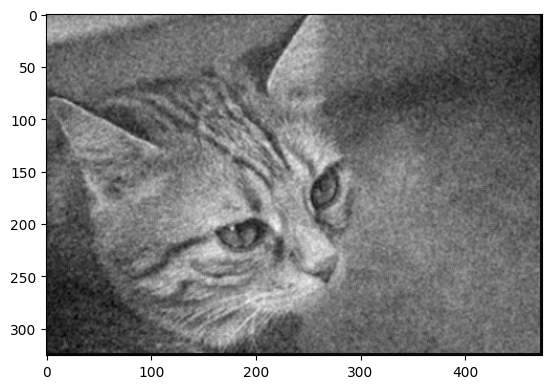

In [ ]:
def average_filter(image, mask):
  row, column = image.shape
  mh, mw = mask.shape
  filtered_image=np.zeros(image.shape)
  for i in range(row-mh+1):
    for j in range(column-mw+1):
      rows=range(i, i+mh)
      columns=range(j,j+mw)
      part=image[np.ix_(rows, columns)]*mask
      filtered_image[i,j]=part.sum()
  return np.array(filtered_image)

mask=np.array([[1/9, 1/9,1/9], [1/9, 1/9,1/9], [1/9, 1/9,1/9]])
plt.imshow(average_filter(gnoise_img, mask), cmap='gray')

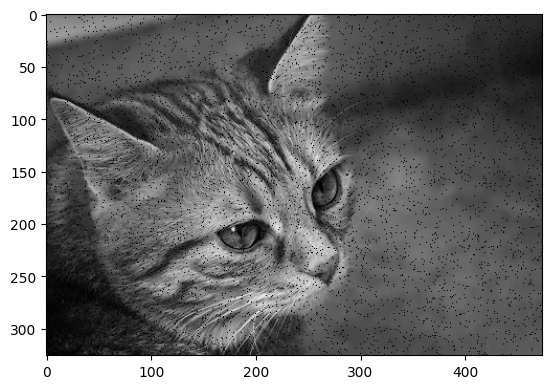

In [ ]:
def add_SnP_noise(image):
  n=5000
  x=np.random.randint(0, image.shape[0],n)
  y=np.random.randint(0,image.shape[1],n)
  new_image=image
  for i in range(len(x)):
    new_image[x[i]][y[i]]=np.random.choice(a=[0,1])
  return new_image

snp_image=add_SnP_noise(image)
plt.imshow(snp_image, cmap='gray')

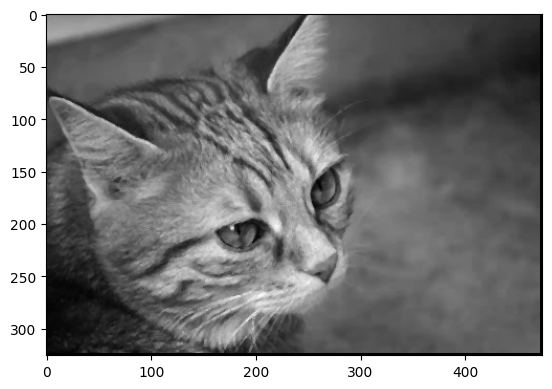

In [ ]:
def median_filtering(image):
  row, column = image.shape
  mh, mw = 3,3
  new_image=np.zeros((row, column))
  for i in range(row-mw+1):
    for j in range(column-mh+1):
      rows=range(i, i+mw)
      columns=range(j, j+mh)
      part=np.sort(np.ravel(image[np.ix_(rows, columns)]))
      new_image[i,j]=part[5]
  return new_image

med_image=median_filtering(snp_image)
plt.imshow(med_image, cmap='gray')

### **EXPT - 5**

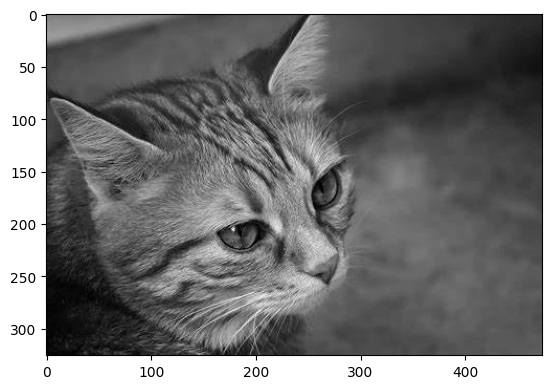

In [ ]:
image=cv2.imread('/content/cat.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

In [ ]:
def apply_filter(image, mask):
  row,column = image.shape
  mw, mh = mask.shape
  filtered_image = np.zeros(image.shape)
  for i in range(row-mw+1):
    for j  in range(column - mh + 1):
      rows=range(i,i+mw)
      columns=range(j,j+mh)
      part=image[np.ix_(rows, columns)]*mask
      filtered_image[i][j]=part.sum()
  return filtered_image

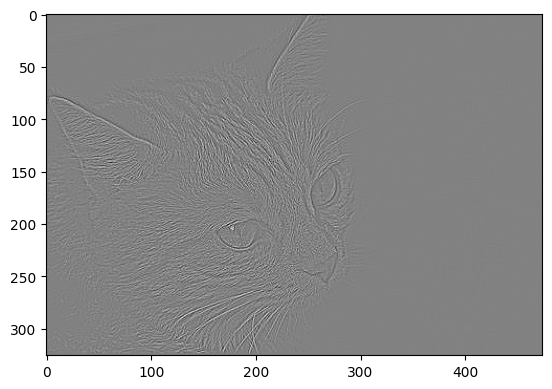

In [ ]:
def high_pass_filter(image):
  return(apply_filter(image, np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])))

high_pass_image=high_pass_filter(image)
plt.imshow(high_pass_image, cmap='gray')

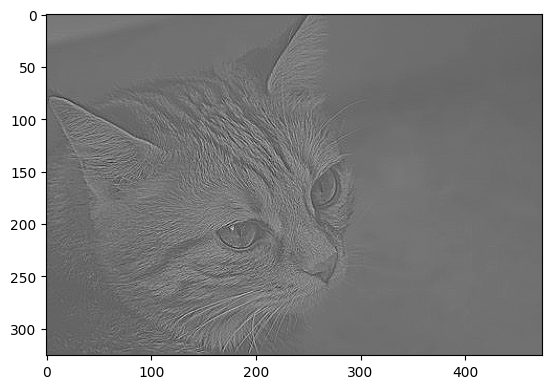

In [ ]:
def high_boost_filter(image, A):
  return (A-1)*image + high_pass_filter(image)

hbf=high_boost_filter(image,2)
plt.imshow(hbf,cmap='gray')

### **EXPT - 6**

<Axes: ylabel='Count'>

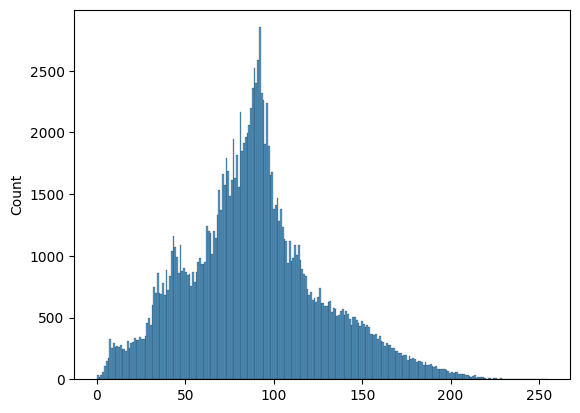

In [ ]:
import seaborn as sns
def hist_equalization(image):
  hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])
  cdf=hist.cumsum()
  normalized_cdf=(cdf-cdf.min())*255/(cdf.max()-cdf.min())
  equalized_image=np.interp(image.flatten(), bins[:-1],normalized_cdf).reshape(image.shape)
  return equalized_image
sns.histplot(image.flatten(),bins=256)

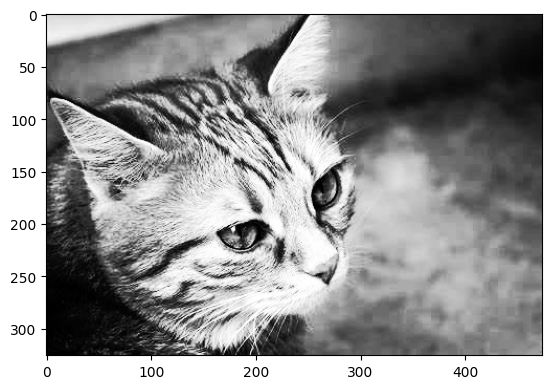

In [ ]:
eq_image=hist_equalization(image)
plt.imshow(eq_image,cmap='gray')


<Axes: ylabel='Count'>

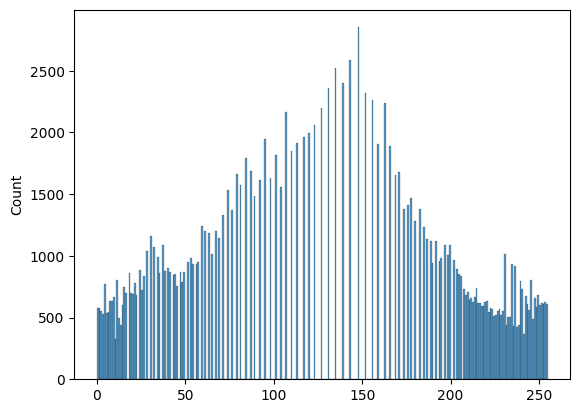

In [ ]:
sns.histplot(eq_image.flatten(),bins=256)

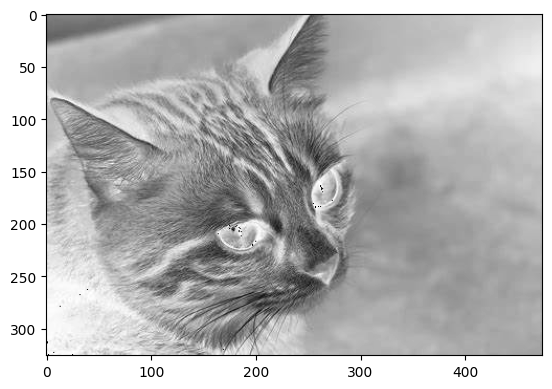

In [ ]:
def hist_stretching(image, l, h):
  return np.clip(((h-l)*(image-image.min())/(image.max()-image.min()))+l,0,255)

stretch_img=hist_stretching(image,0,255)
plt.imshow(stretch_img, cmap='gray')

<Axes: ylabel='Count'>

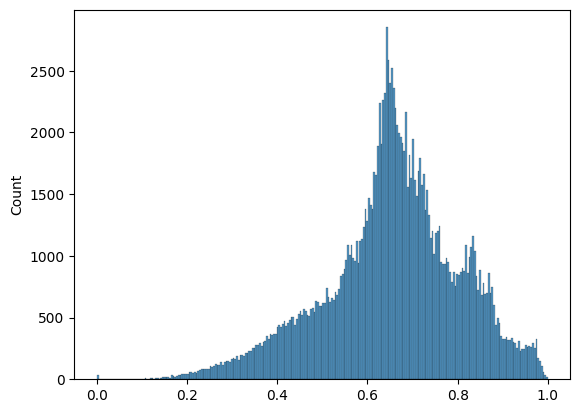

In [ ]:
sns.histplot(stretch_img.flatten(), bins=256)

(array([14741., 15406., 14591., 16595., 13511., 14914., 16749., 16667.,
        15194., 16156.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

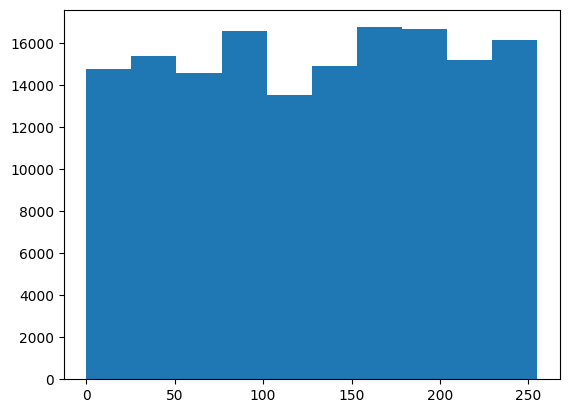

In [ ]:
import numpy as np

def histogram_equalisation(image):
    hist, bins = np.histogram(image.flatten(), bins=256)
    cdf = hist.cumsum()
    normalized_cdf = (cdf-cdf.min())*255/(cdf.max()- cdf.min())
    equalized_image=np.interp(image.flatten(),bins[:-1],normalized_cdf)
    return equalized_image.reshape(image.shape)


histogram_equalisation_img= histogram_equalisation(image)
plt.hist(x=histogram_equalisation_img.flatten())

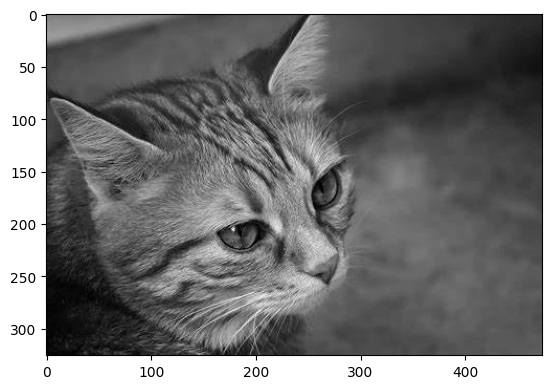

In [ ]:
def histogram_stretching(image, r_min, r_max):
    min_pixel = np.min(image)
    max_pixel = np.max(image)
    #(desired diff / current diff) * (image - current min) + desired min
    stretched_image = ((r_max- r_min)/ (max_pixel - min_pixel)) * (image- min_pixel) + r_min
    stretched_image = np.clip(stretched_image, 0, 255)

    return stretched_image
plt.imshow(histogram_stretching(image, 0, 100), cmap='gray')

### **EXPT - 7**

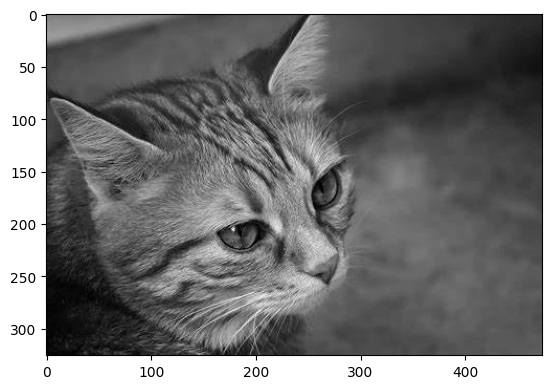

In [ ]:
image=cv2.imread('/content/cat.jpeg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

In [ ]:
image.shape

(326, 474)

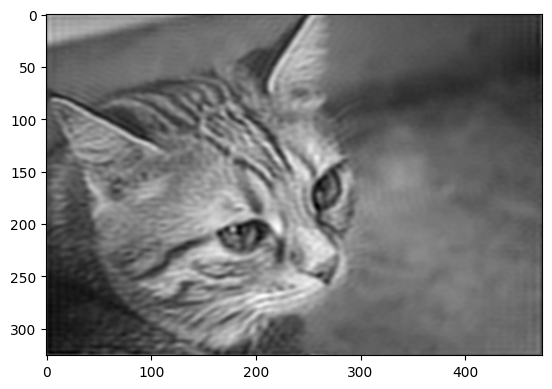

In [ ]:
def center_img(image):
  new_image=np.zeros(image.shape)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      new_image[i,j]=math.pow(-1,(i+j))*image[i,j]
  return new_image

def fft(image):
  return np.fft.fft2(image)

def invfft(image):
  return np.fft.ifft2(image)

def ideal_lp_filter(image,t):
  s1=center_img(image)
  s2=fft(s1)
  huv=np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      huv[i,j]=(math.sqrt(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))<=t)
  s3=s2*huv
  s4=invfft(s3)
  s5=np.array([elem.real for elem in invfft(s3)]).reshape(s4.shape)
  s6=center_img(s5)
  return s6

lp_image=ideal_lp_filter(image,60)
plt.imshow(lp_image,cmap='gray')

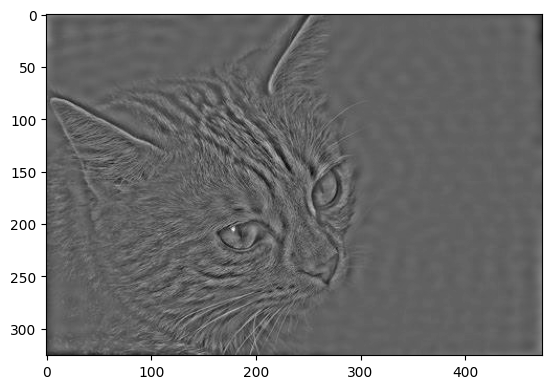

In [ ]:
def ideal_hp_filter(image, t):
  s1=center_img(image)
  s2=fft(s1)
  huv=np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      huv[i,j]=(math.sqrt(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))>t)
  s3=s2*huv
  s4=invfft(s3)
  s5=np.array([elem.real for elem in invfft(s3)]).reshape(s4.shape)
  s6=center_img(s5)
  return s6

hp_image=ideal_hp_filter(image,20)
plt.imshow(hp_image, cmap='gray')

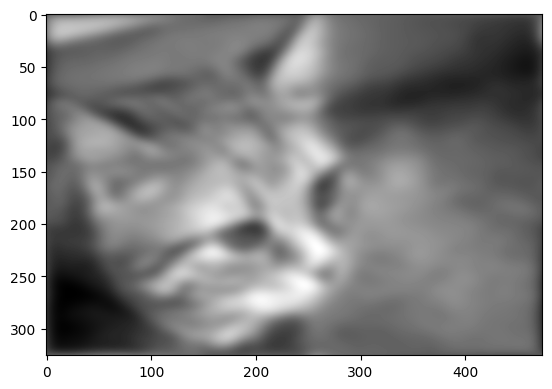

In [ ]:
def gaussian_lp_filter(image,t):
  s1=center_img(image)
  s2=fft(s1)
  huv=np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      huv[i,j]=np.exp(-2*(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))/(math.pow(t,2)))
  s3=s2*huv
  s4=invfft(s3)
  s5=np.array([elem.real for elem in invfft(s3)]).reshape(s4.shape)
  s6=center_img(s5)
  return s6

lp_gimage=gaussian_lp_filter(image,20)
plt.imshow(lp_gimage, cmap='gray')

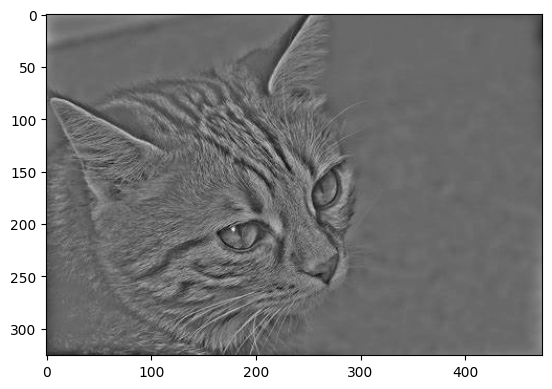

In [ ]:
def gaussian_hp_filter(image,t):
  s1=center_img(image)
  s2=fft(s1)
  huv=np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      huv[i,j]=1-(np.exp(-2*(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))/(math.pow(t,2))))
  s3=s2*huv
  s4=invfft(s3)
  s5=np.array([elem.real for elem in invfft(s3)]).reshape(s4.shape)
  s6=center_img(s5)
  return s6

hp_gimage=gaussian_hp_filter(image,20)
plt.imshow(hp_gimage, cmap='gray')

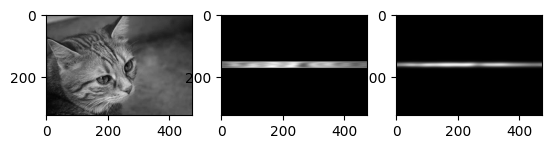

In [ ]:
#ideal low pass
def ideal_lp_filter(image,t):
    s1=center_img(image)
    s2=np.fft.fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=(math.sqrt(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))<=t)
    s3=s2*huv
    s4=np.fft.ifft(s3).real
    s5=center_img(s4)
    return s5

#gaussian low pass
def gauss_lp_filter(image,t):
    s1=center_img(image)
    s2=np.fft.fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=np.exp(-2*(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))/(math.pow(t,2)))
    s3=s2*huv
    s4=np.fft.ifft(s3)
    s5=np.array([elem.real for elem in np.fft.ifft(s3)]).reshape(s4.shape)
    s6=center_img(s5)
    return s6

g_lp_filter_img = gauss_lp_filter(image, 10)
ideal_lp_filter_img=ideal_lp_filter(image, 10)

figure, axis = plt.subplots(1,3)
axis[1].imshow(ideal_lp_filter_img, cmap='gray')
axis[2].imshow(g_lp_filter_img, cmap='gray')
axis[0].imshow(image, cmap='gray')

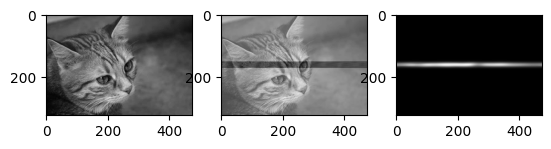

In [ ]:
#ideal high pass
def ideal_hp_filter(image, t):
  s1 = center_img(image)
  s2 = np.fft.fft(s1)
  huv = np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      huv[i,j] = (math.sqrt(math.pow(i-s2.shape[0]/2, 2) + math.pow(j-s2.shape[1]/2, 2)) > t)
  s3 = s2*huv
  s4= np.fft.ifft(s3).real
  s5 = center_img(s4)
  return s5

def gauss_hp_filter(image, t):
  s1 = center_img(image)
  s2 = np.fft.fft(s1)
  huv = np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      huv[i,j] = np.exp(-2*(math.pow(i-s2.shape[0]/2, 2) + math.pow(j-s2.shape[1]/2, 2)) / math.pow(t,2))
  s3 = s2*huv
  s4 = np.fft.ifft(s3).real
  s5= center_img(s4)
  return s5

g_hp_filter_img = gauss_hp_filter(image, 10)
ideal_hp_filter_img=ideal_hp_filter(image, 10)

figure, axis = plt.subplots(1,3)
axis[1].imshow(ideal_hp_filter_img, cmap='gray')
axis[2].imshow(g_hp_filter_img, cmap='gray')
axis[0].imshow(image, cmap='gray')

## **EXPT - 8**

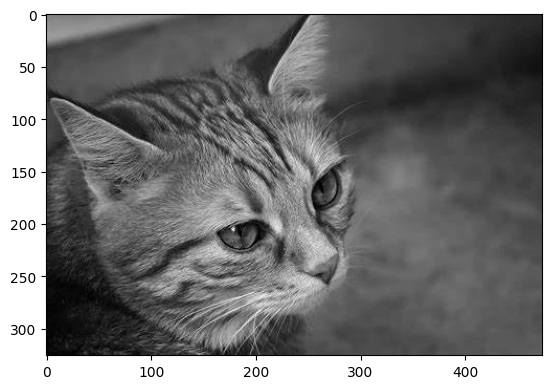

In [ ]:
image=cv2.imread('/content/cat.jpeg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
binary_image=np.where(image>127,1,0)

In [ ]:
def erosion(image,mask):
    eroded_image=np.zeros_like(image)
    row_pad=mask.shape[0]//2
    col_pad=mask.shape[1]//2
    padded_image=np.pad(image,((row_pad,row_pad),(col_pad,col_pad)))
    kernel_mask=(mask==1)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sub_array = padded_image[i:i + mask.shape[0], j:j + mask.shape[1]]
            if np.all(sub_array[kernel_mask]):
                eroded_image[i, j] = 1
    return eroded_image

In [ ]:
def dilation(image, mask):
  row_pad = mask.shape[0]//2
  col_pad = mask.shape[1]//2
  dilated_img = np.zeros(image.shape)
  padded_img = np.pad(image, ((row_pad, row_pad), (col_pad, col_pad)))
  kernel = (mask==1)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      sub_array = padded_img[i:i+mask.shape[0], j:j+mask.shape[1]]
      if(np.any(sub_array[kernel])):
        dilated_img[i,j] = 1
  return dilated_img

In [ ]:
def opening(image,mask):
    return dilation(erosion(image,mask),mask)

def closing(image, mask):
  return erosion(dilation(image, mask), mask)

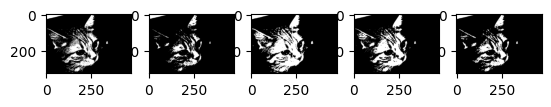

In [ ]:
figure, axis = plt.subplots(1,5)

binary_image = np.where(image>128, 1,0)

eroded_img = erosion(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[1].imshow(eroded_img, cmap='gray')
dilated_img = dilation(binary_image,  np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[2].imshow(dilated_img, cmap='gray')
close=closing(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[3].imshow(close, cmap='gray')
open = opening(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[4].imshow(open, cmap='gray')
axis[0].imshow(binary_image, cmap='gray')
plt.show()

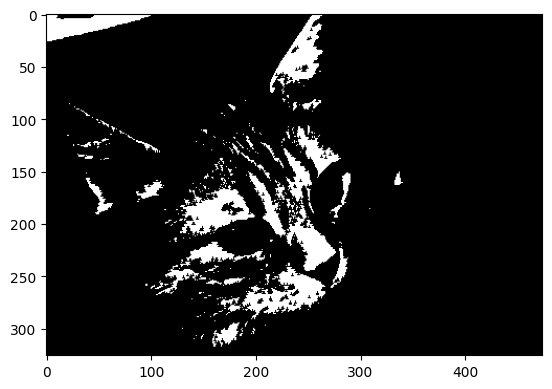

In [ ]:
def hmt(image, b1, b2):
  image_c = np.where(image==0, 1, 0)
  hmt = np.bitwise_and(erosion(image, b1), erosion(image_c, b2))
  return hmt

hmt = hmt(binary_image, np.array([[1,1,1],[0,1,0],[0,1,0]]),np.array([[0,0,0],[0,0,-1],[0,0,-1]]))
plt.imshow(hmt, cmap='gray')

### **EXPT - 9**

<ipython-input-55-21576a54db82>:54: RuntimeWarning: overflow encountered in scalar subtract
  if y < width - 1 and abs(image[x, y] - image[x, y+1]) < threshold:
<ipython-input-55-21576a54db82>:50: RuntimeWarning: overflow encountered in scalar subtract
  if x < height - 1 and abs(image[x, y] - image[x+1, y]) < threshold:
<ipython-input-55-21576a54db82>:48: RuntimeWarning: overflow encountered in scalar subtract
  if x > 0 and abs(image[x, y] - image[x-1, y]) < threshold:
<ipython-input-55-21576a54db82>:52: RuntimeWarning: overflow encountered in scalar subtract
  if y > 0 and abs(image[x, y] - image[x, y-1]) < threshold:


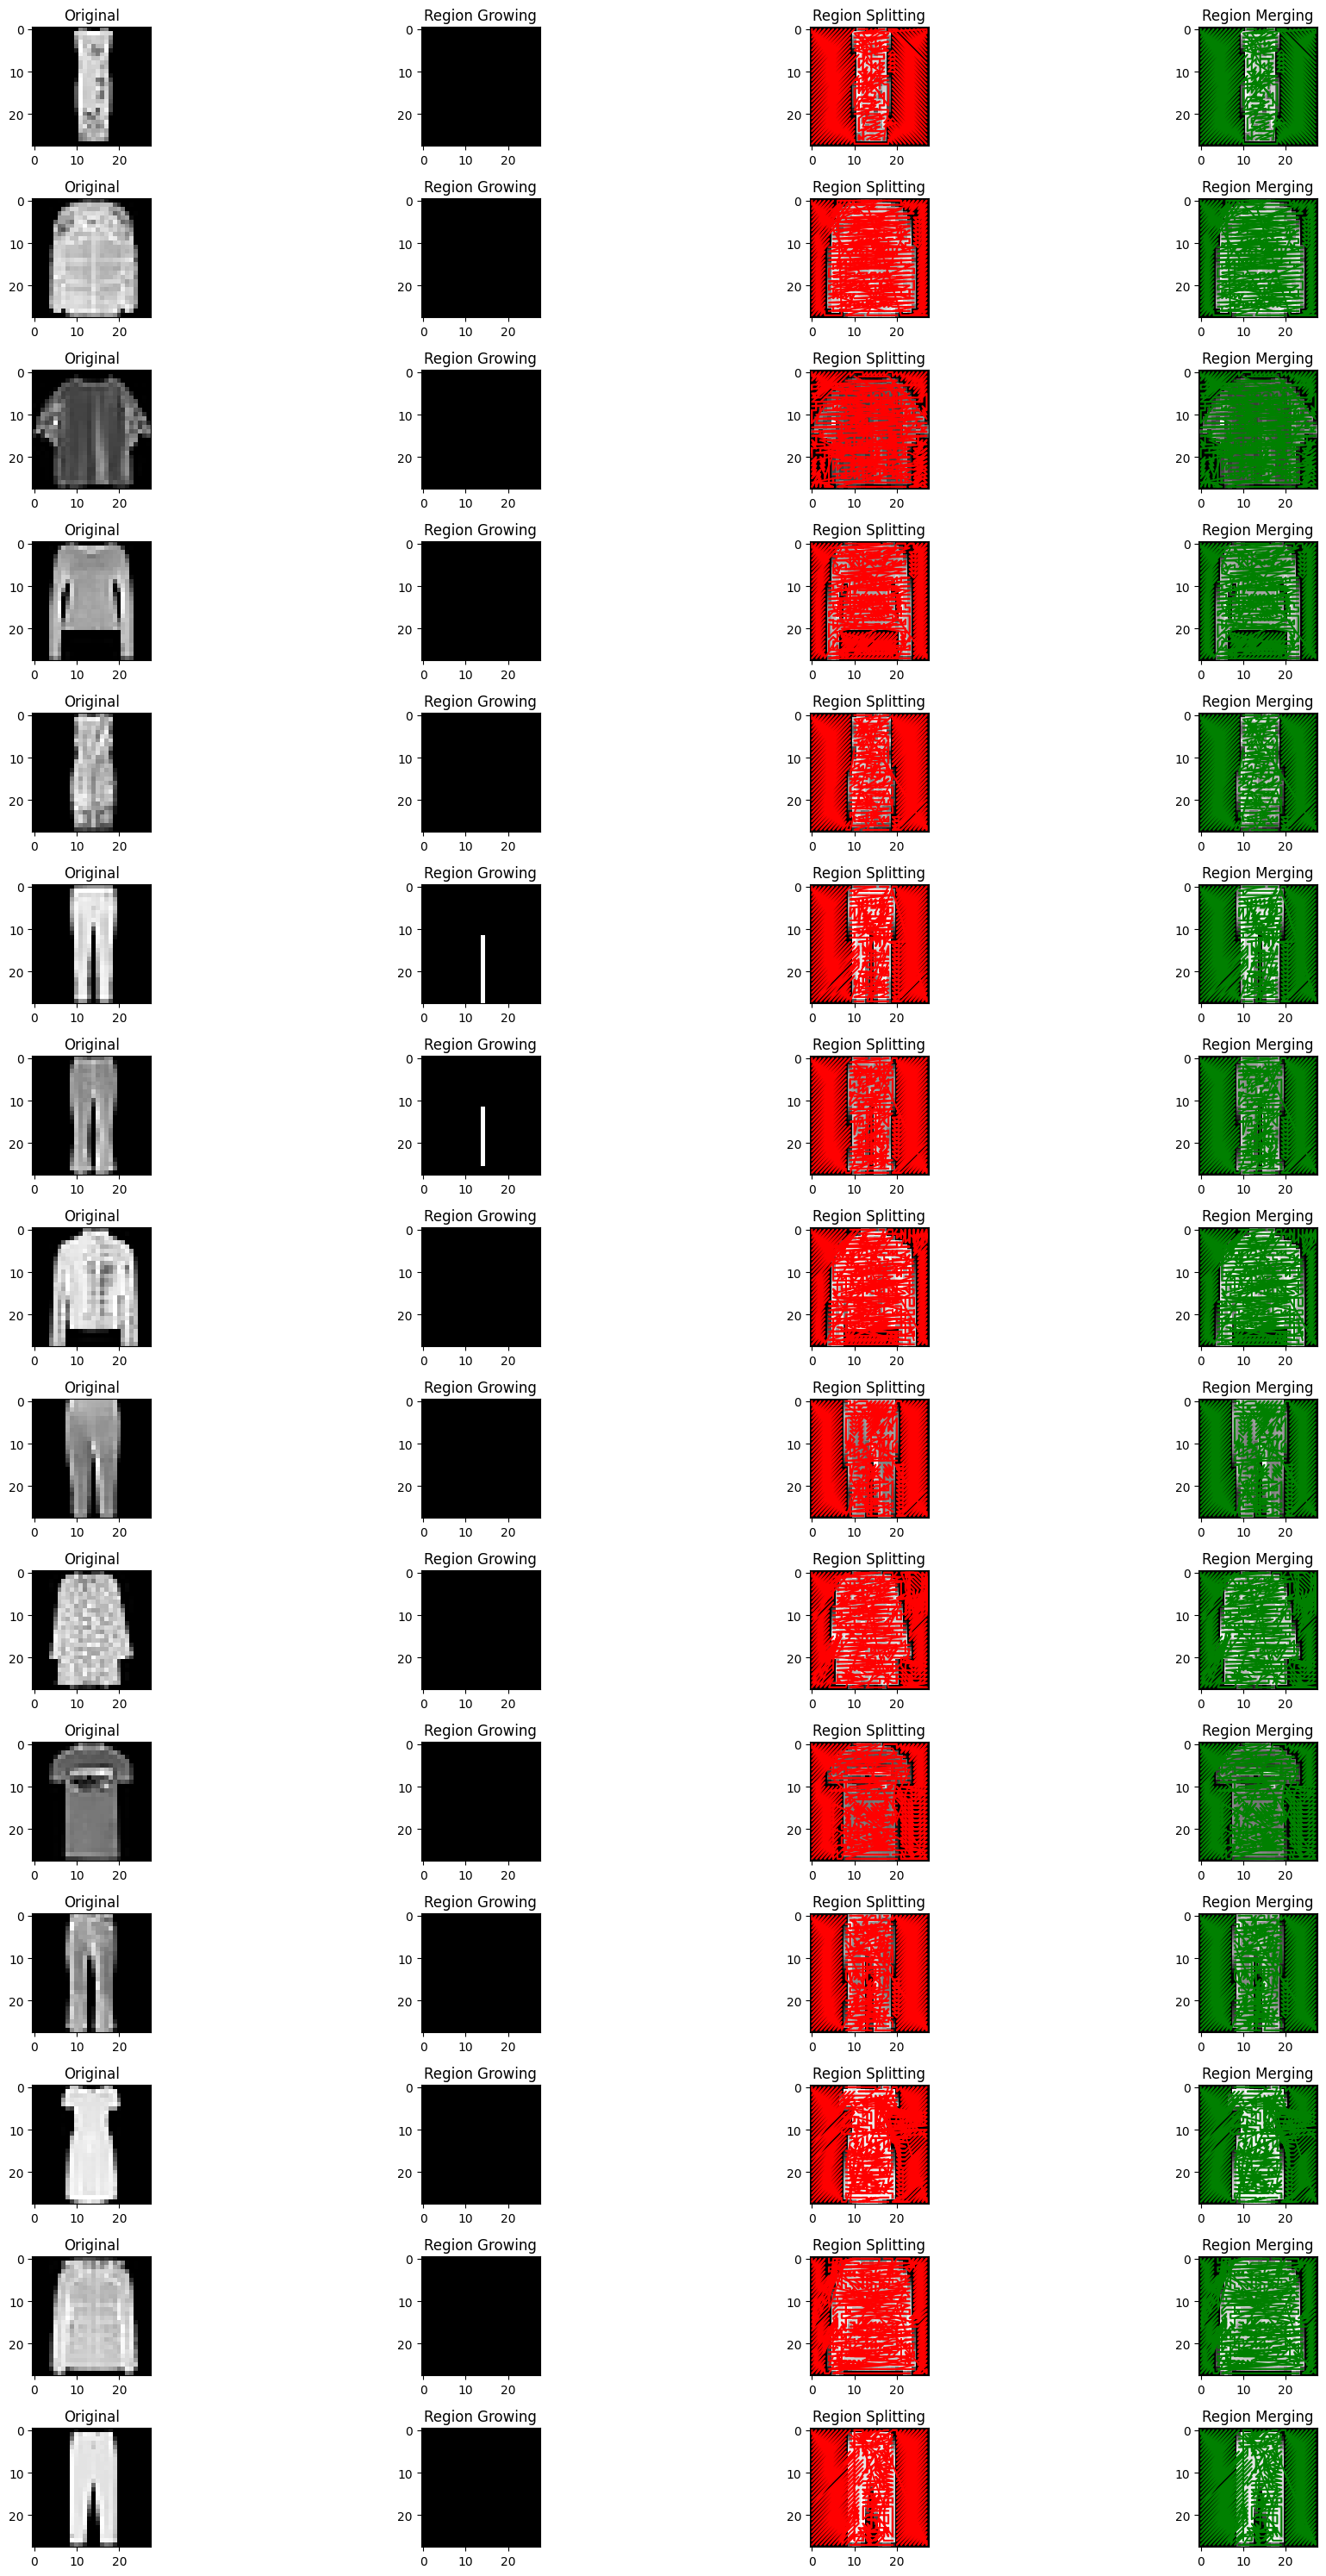

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.datasets import fashion_mnist

(train_images, _), _ = fashion_mnist.load_data()

def region_growing(image, seed, threshold):
    height, width = image.shape
    visited = np.zeros((height, width), dtype=bool)
    segmented_image = np.zeros_like(image)

    queue = [seed]
    while queue:
        current_point = queue.pop(0)
        x, y = current_point

        if not visited[x, y]:
            if abs(image[x, y] - np.mean(segmented_image)) < threshold:
                segmented_image[x, y] = 255
                visited[x, y] = True
                if x > 0:
                    queue.append((x - 1, y))
                if x < height - 1:
                    queue.append((x + 1, y))
                if y > 0:
                    queue.append((x, y - 1))
                if y < width - 1:
                    queue.append((x, y + 1))

    return segmented_image
def region_splitting(image, threshold):
    regions = []
    height, width = image.shape
    visited = np.zeros((height, width), dtype=bool)

    def explore_region(start_point):
        region = []
        queue = [start_point]

        while queue:
            current_point = queue.pop(0)
            x, y = current_point

            if not visited[x, y]:
                visited[x, y] = True
                region.append(current_point)
                if x > 0 and abs(image[x, y] - image[x-1, y]) < threshold:
                    queue.append((x - 1, y))
                if x < height - 1 and abs(image[x, y] - image[x+1, y]) < threshold:
                    queue.append((x + 1, y))
                if y > 0 and abs(image[x, y] - image[x, y-1]) < threshold:
                    queue.append((x, y - 1))
                if y < width - 1 and abs(image[x, y] - image[x, y+1]) < threshold:
                    queue.append((x, y + 1))

        return region

    for i in range(height):
        for j in range(width):
            if not visited[i, j]:
                region = explore_region((i, j))
                regions.append(region)

    return regions
def region_merging(regions, threshold):
    merged_regions = []
    for region in regions:
        mean_intensity = np.mean([train_images[pixel[0], pixel[1]] for pixel in region])
        for merged_region in merged_regions:
            if abs(mean_intensity - np.mean([train_images[pixel[0], pixel[1]] for pixel in merged_region])) < threshold:
                merged_region.extend(region)
                break
        else:
            merged_regions.append(region)
    return merged_regions

random_indices = np.random.randint(0, train_images.shape[0], size=15)

plt.figure(figsize=(20, 30))
for i, idx in enumerate(random_indices):
    random_image = train_images[idx]
    seed_point = (random_image.shape[0] // 2, random_image.shape[1] // 2)
    threshold_rg = 20
    segmented_image_rg = region_growing(random_image, seed_point, threshold_rg)
    threshold_rs = 20
    regions = region_splitting(random_image, threshold_rs)
    merged_regions = region_merging(regions, threshold_rs)
    plt.subplot(15, 4, i * 4 + 1)
    plt.imshow(random_image, cmap='gray')
    plt.title('Original')

    plt.subplot(15, 4, i * 4 + 2)
    plt.imshow(segmented_image_rg, cmap='gray')
    plt.title('Region Growing')

    plt.subplot(15, 4, i * 4 + 3)
    plt.imshow(random_image, cmap='gray')
    for region in regions:
        plt.plot([pixel[1] for pixel in region], [pixel[0] for pixel in region], 'r')
    plt.title('Region Splitting')

    plt.subplot(15, 4, i * 4 + 4)
    plt.imshow(random_image, cmap='gray')
    for region in merged_regions:
        plt.plot([pixel[1] for pixel in region], [pixel[0] for pixel in region], 'g')
    plt.title('Region Merging')

plt.tight_layout()
plt.show()
